### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib Qt

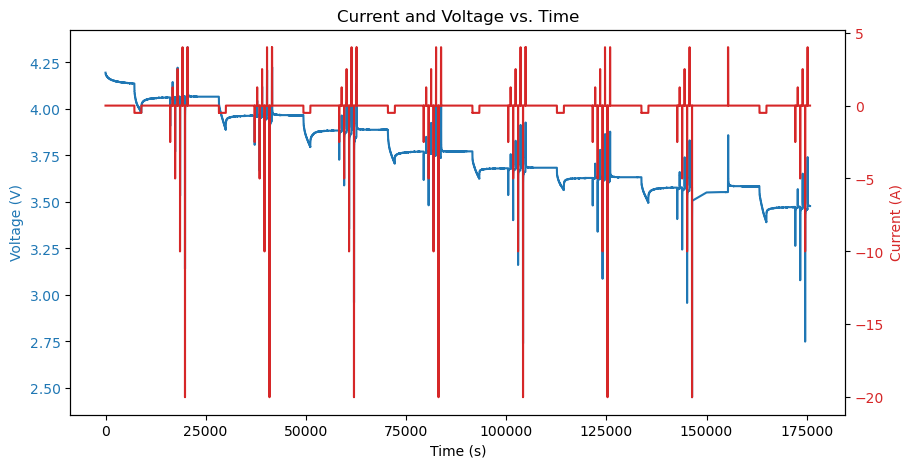

In [2]:
T0data = pd.read_csv('./data/Model_Training_Data_0.csv')

# plot current and voltage in the same plot
fig, ax1 = plt.subplots(figsize=(10, 5))
color = 'tab:blue'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage (V)', color=color)
ax1.plot(T0data['Time (s)'], T0data['Voltage (V)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Current (A)', color=color)
ax2.plot(T0data['Time (s)'], T0data['Current (A)'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Current and Voltage vs. Time')
plt.show()

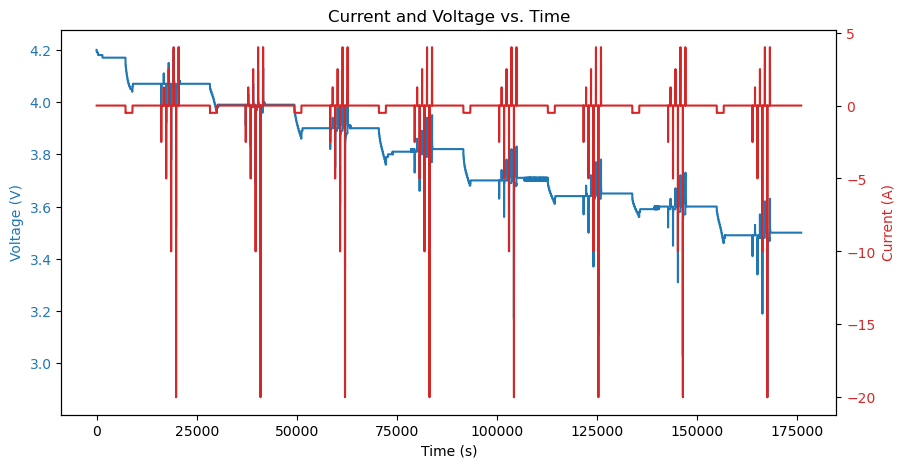

In [3]:
T0data = pd.read_csv('./data/Model_Training_Data_20.csv')

# plot current and voltage in the same plot
fig, ax1 = plt.subplots(figsize=(10, 5))
color = 'tab:blue'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage (V)', color=color)
ax1.plot(T0data['Time (s)'], T0data['Voltage (V)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Current (A)', color=color)
ax2.plot(T0data['Time (s)'], T0data['Current (A)'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Current and Voltage vs. Time')
plt.show()

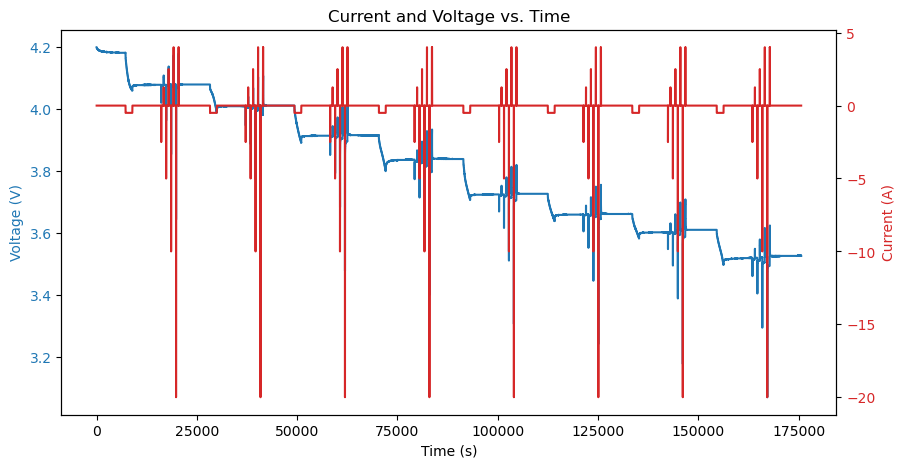

In [4]:
T0data = pd.read_csv('./data/Model_Training_Data_40.csv')

# plot current and voltage in the same plot
fig, ax1 = plt.subplots(figsize=(10, 5))
color = 'tab:blue'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage (V)', color=color)
ax1.plot(T0data['Time (s)'], T0data['Voltage (V)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Current (A)', color=color)
ax2.plot(T0data['Time (s)'], T0data['Current (A)'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Current and Voltage vs. Time')
plt.show()